In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="darkgrid")
a=pd.read_excel('C:\\Users\Ogeid99\Desktop\DS\excel\provacatalogo.xlsx')
b=(a['Time'] > '2020-03-10').astype(int)
c=[a,b]
a=pd.concat(c, axis=1)
column_names = a.columns.values
column_names[14] = 'Time_date'
magnitude_threshold= 6.5
#a.reset_index(drop=True, inplace=True)
#another_value_for_Jean=pd.Series(3.5)
#another_value_for_Jean.reset_index(drop=True, inplace=True)
#a_new=pd.concat([ another_value_for_Jean,a['Magnitude']],ignore_index=True) #it ignores indexes
a_new=a['Magnitude']
conditional_Magnitude=(a_new > magnitude_threshold).astype(int)
conditional_Magnitude=pd.Series(conditional_Magnitude)
first_parameter=np.power(10,0.032*a_new+2.7389)
second_parameter=np.power(10,0.549* a_new-0.547)
array_algo=pd.Series(np.where(conditional_Magnitude, first_parameter, second_parameter)  ) 
array_algo_d=pd.Series(np.power(10,0.1238*a_new+0.983) )
#the function pow converts into float 
#instead of ** that gives the integer
magnitude=pd.Series(a_new)
array_algo.name='tempo(giorni)' #GIVE THE NAME TO THE DATASETS IF YOU WANNA MERGE  THEM !!
#magnitude,array_algo
array_algo_d.name='distanza(Km)'
#df_columns=np.array([['  ', 'Magnitude'], ['Declustering', 'distanza(Km)'], ['Declustering', 'tempo(giorni)'],])
#columns_declustering=pd.MultiIndex.from_frame(df_columns)
final_df=pd.concat([magnitude,array_algo,array_algo_d], axis=1)
#final_df=pd.DataFrame(final_df,columns=columns_declustering) #merge two datasets
final_df.style.set_caption("Declustering method by Knopoff and Gardner 1972 ") # set a title to the table

,Magnitude,tempo(giorni),distanza(Km)
0,2.100000,4.035525,17.497661
1,2.000000,3.556313,17.005915
2,2.800000,9.776874,21.361906
3,2.000000,3.556313,17.005915
4,2.200000,4.579310,18.003627
5,2.800000,9.776874,21.361906
6,2.300000,5.196369,18.524223
7,2.100000,4.035525,17.497661
8,2.200000,4.579310,18.003627
9,2.400000,5.896577,19.059873


[None]

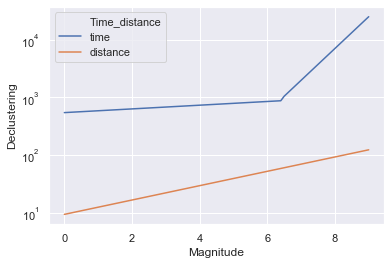

In [75]:
#change time1,time2,distance to do this with an other method
line_marker=np.arange(0,6.5,0.1)
line_marker2=np.arange(6.5,9.1,0.1)
total_line=np.arange(0,9.1,0.1)
total_line_series=pd.Series(total_line)
time1=np.power(10,0.032*line_marker+2.7389)
time2=np.power(10,0.549* line_marker2-0.547)
time1_df=pd.concat([pd.Series(time1),pd.Series(line_marker)], axis=1)
time2_df=pd.concat([pd.Series(time2),pd.Series(line_marker2)],axis=1)
time1_add=pd.Series(np.full(np.count_nonzero(time1),'time'))
time2_add=pd.Series(np.full(np.count_nonzero(time2),'time'))
time11=pd.concat([time1_df,time1_add], axis=1)
time22=pd.concat([time2_df,time2_add], axis=1)
time1_time2=pd.concat([time11,time22], axis=0)
distance=pd.Series(np.power(10,0.1238*(total_line)+0.983))
distance_add=pd.Series(np.full(np.count_nonzero(distance),'distance'))
distance11=pd.concat([distance,total_line_series, distance_add], axis=1)
val=time1_time2.columns.values
val[2]='2'
time1_time2
df=pd.concat([time1_time2,distance11], axis=0)
df.columns=['Declustering','Magnitude','Time_distance']
#df_new=pd.concat([total_line_series,df], axis=1)
#df_new
#b=(a['Time'] > '2020-03-10').astype(int)
#pd.DataFrame({})
graph_df = sns.lineplot(x="Magnitude", y="Declustering", hue='Time_distance', data=df)
graph_df.set(yscale="log")